In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from scipy.io import loadmat
from scipy.sparse import csc_matrix, csr_matrix


import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import learning_curve

In [2]:
task2_data = loadmat('zad1')
X = np.array(task2_data['X'].T)
T = np.array(task2_data['T'])
classes = [0,1]

In [3]:
print(X, X.shape)

[[1.  1. ]
 [2.  1. ]
 [1.  2. ]
 [2.  2. ]
 [1.5 1.5]
 [2.5 1.5]
 [1.2 2.1]
 [2.  2. ]
 [2.  3. ]
 [3.  2. ]
 [3.  3. ]
 [3.  4. ]
 [4.1 3.9]
 [2.7 2.2]
 [2.6 3.6]
 [3.6 2.4]
 [3.4 3.5]
 [3.8 4.9]
 [4.  3. ]
 [3.  5. ]
 [3.  6. ]
 [4.  4. ]
 [4.  5. ]
 [4.  6. ]
 [5.  6. ]
 [6.  5. ]
 [5.  4. ]] (27, 2)


In [4]:
X_test = np.array([[2.4, 2.1], [2.4, 2.7], [2.4, 2.5]]);

In [5]:
Tc = np.array(csr_matrix.todense(task2_data['T']))
print(Tc, Tc.shape)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
  1. 1. 1.]] (3, 27)


In [6]:
y_classes = np.array([np.argmax(data) for data in Tc.T])
y_classes = y_classes[y_classes!=2]
X = X[:len(y_classes),:]

In [7]:
print(y_classes, y_classes.shape)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1] (19,)


In [8]:
print(X.shape)

(19, 2)


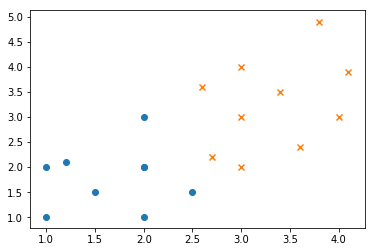

In [9]:
arg_0 = np.where(y_classes == 0)
arg_1 = np.where(y_classes == 1)
plt.scatter(X[arg_0,0], X[arg_0,1], marker='o')
plt.scatter(X[arg_1,0], X[arg_1,1], marker='x')

In [10]:
#MLP = MLPClassifier(hidden_layer_sizes=(19,),max_iter=1200)
MLP = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1200)

In [11]:
MLP.fit(X, y_classes)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
y_pred = MLP.predict(X_test)

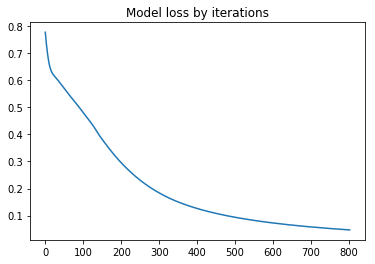

In [13]:
plt.title('Model loss by iterations')
plt.plot(MLP.loss_curve_)

In [14]:
def plot_predictions():
    
    plt.title("Predicted classes")
    
    arg_0 = np.where(y_pred == 0)
    arg_1 = np.where(y_pred == 1)
    plt.scatter(X_test[arg_0,0], X_test[arg_0,1], marker='o', c='red', label='Predicted O')
    plt.scatter(X_test[arg_1,0], X_test[arg_1,1], marker='x', c='red', label='Predicted X')

    arg_0 = np.where(y_classes == 0)
    arg_1 = np.where(y_classes == 1)
    plt.scatter(X[arg_0,0], X[arg_0,1], marker='o', label='True O')
    plt.scatter(X[arg_1,0], X[arg_1,1], marker='x', label='True X')
    plt.legend()
    plt.show()

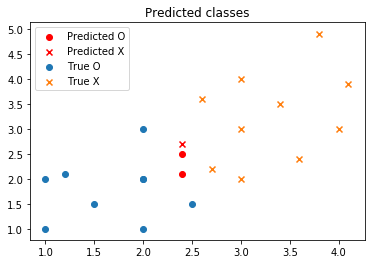

In [15]:
plot_predictions()